## Creating a Perceptron from Scratch

In [9]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read in data 
data = pickle.load(open('perceptron-data.pkl', 'rb'), encoding='latin1')
labels = data['labels'].astype(np.int)
inputs = data['vectors']

In [3]:
# Perceptron Learning Rule formula for updating weights
def perceptron_learning_rule (current_X, current_y, learning_rate, target):
    change_in_weight0 = learning_rate * current_X[0] * (target - current_y)
    change_in_weight1 = learning_rate * current_X[1] * (target - current_y)
    change_in_bias = learning_rate * (target - current_y)
    return [change_in_weight0, change_in_weight1, change_in_bias]

In [4]:
# Activation function
def activation(summation):
    if summation>= 0:
        return 1
    else:
        return 0

In [5]:
# Retrieve number of labels
(num_labels, _) = labels.shape
num_labels

100

In [6]:
# Randomizes order of inputs and associated outputs for each epoch
def randomizer(inputs,labels):
    num_list = list(range(num_labels))
    random.shuffle(num_list)
    feature_X0 = []
    feature_X1 = []
    label_y = []
    for i in num_list:
        feature_X0.append(inputs[0,i])
        feature_X1.append(inputs[1,i])
        label_y.append(labels[i])
    feature_X0 = np.array([feature_X0])
    feature_X1 = np.array([feature_X1])
    randomized_labels = np.array([label_y])
    randomized_inputs = np.concatenate((feature_X0,feature_X1) ,axis = 0)
    
    return randomized_inputs, randomized_labels, num_list

In [7]:
# Train Perceptron in 10 seperate runs of 300 epochs each
compiled_data = []
for k in range(10):
    randomized_inputs, randomized_labels, num_list = randomizer(inputs,labels)
    feature_weights = [random.uniform(-1,1),random.uniform(-1,1)]
    learning_rate = 0.0005
    bias = random.uniform(-1,1)
    epoch_list = []  
    for l in range(300):
        correctly_labelled = 0

        for i in num_list: 
            x=randomized_inputs[:,i]

            y_desired=randomized_labels[0][i][0]
            summation = np.sum(x * feature_weights) + bias      
            y=activation(summation) 

            if y_desired==y:         
                correctly_labelled+=1   

            delta = perceptron_learning_rule(x,y,learning_rate,y_desired)     
            feature_weights[0]=feature_weights[0]+delta[0]    
            feature_weights[1]=feature_weights[1]+delta[1]
            bias = bias + delta[2]
            accuracy = correctly_labelled/100
        epoch_list.append(accuracy)
    compiled_data.append(epoch_list)

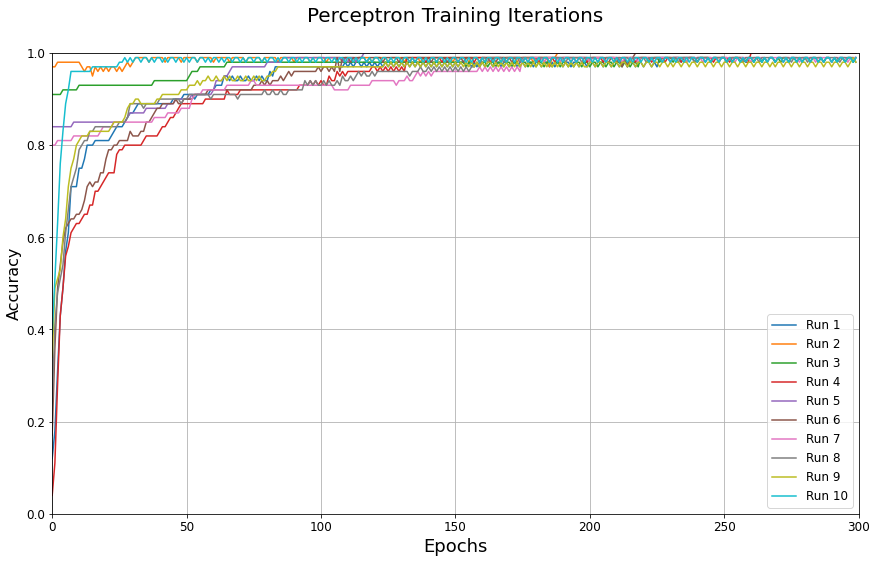

In [8]:
# Plot comparing each of the runs and the accuracy after each epoch
fig = plt.figure(figsize = (14,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Perceptron Training Iterations', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
ax.grid()

plt.xlim([0, 300])
plt.ylim([0, 1])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

t = np.arange(0,300)

for i in range(len(compiled_data)):
    s = compiled_data[i]
    ax.plot(t, s, label = 'Run '+ str(i+1))
    
plt.legend(loc="lower right", prop={'size': 12})
plt.show()